# Titatic dataset from kaggle

-try to build a logistic regression model to predict a classification that surival or not with simple command

In [56]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df_titanic = pd.read_csv('titanic_train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


data visualization - สำรวจข้อมูลคร่าวๆ

In [5]:
sns.set_style('whitegrid')

เพศไหนรอดหรือไม่รอดมากว่ากัน

<AxesSubplot:xlabel='Survived', ylabel='count'>

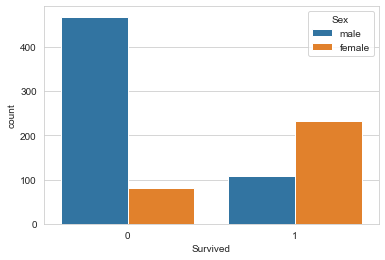

In [34]:
sns.countplot(x='Survived',data=df_titanic,hue='Sex')

ผู้โดยสาร class ใดๆ รอดหรือไม่รอดเป็นจำนวนเท่าไร

<AxesSubplot:xlabel='Survived', ylabel='count'>

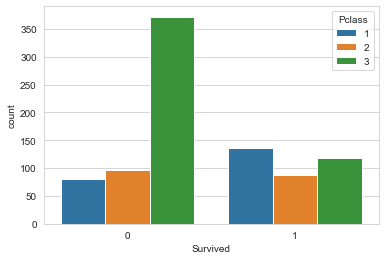

In [35]:
sns.countplot(x='Survived',data=df_titanic,hue='Pclass')

ช่วงอายุของผู้โดยสาร

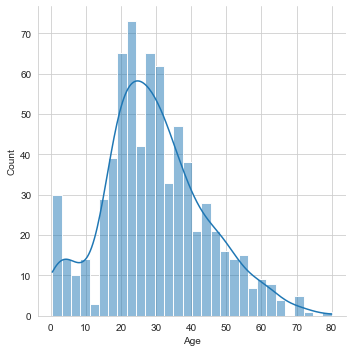

In [41]:
sns.displot(x='Age',data=df_titanic,bins=30,kde=True)

<AxesSubplot:>

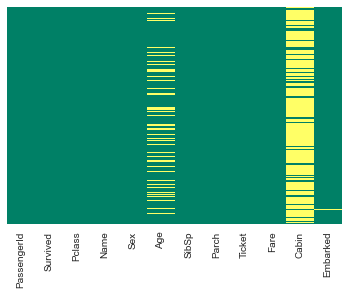

In [50]:
#ดูว่าแถวไหนมีค่าว่างบ้าง
sns.heatmap(df_titanic.isnull(),yticklabels=False,cmap='summer',cbar=False)

drop col หรือเติมข้อมูลที่ว่าง

In [59]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(),inplace=True)

In [61]:
df_titanic.drop(['Cabin'],axis=1,inplace=True)

In [63]:
df_titanic.dropna(axis=0,inplace=True)

<AxesSubplot:>

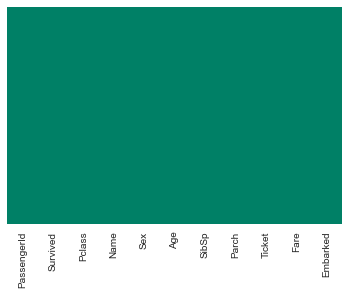

In [64]:
sns.heatmap(df_titanic.isnull(),yticklabels=False,cmap='summer',cbar=False)

In [65]:
df_titanic_new1 = pd.get_dummies(data=df_titanic,columns=['Sex'],drop_first=True)
df_titanic_new1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


# build model

In [71]:
from sklearn.model_selection import train_test_split
X = df_titanic_new1.drop(['PassengerId','Name','Survived','Ticket','Embarked'],axis=1)
y = df_titanic_new1['Survived']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [72]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       167
           1       0.81      0.75      0.78       100

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267

[[149  18]
 [ 25  75]]


 87% accuracy